In [1]:
from cartopy.feature import NaturalEarthFeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from datetime import datetime, timedelta
from matplotlib.colors import LinearSegmentedColormap, from_levels_and_colors
from metpy.units import units
from siphon.catalog import TDSCatalog
from siphon.http_util import session_manager
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import metpy.calc as mpcalc
import numpy as np
import os
import sys

In [2]:
session_manager.set_session_options(auth=('gvincent@andrew.cmu.edu', 'wZfoL5cz!JWH#4'))

In [3]:
ymdh = '2019090112'
data_time = datetime.strptime(ymdh, '%Y%m%d%H')

In [4]:
cat_url = data_time.strftime('https://rda.ucar.edu/thredds/catalog/files/g/ds084.1/%Y/%Y%m%d/catalog.xml')
dataset_name = data_time.strftime('gfs.0p25.%Y%m%d%H.f000.grib2')

In [5]:
catalog = TDSCatalog(cat_url)
ds = catalog.datasets[dataset_name]
dataset = ds.remote_access()

In [6]:
list(dataset.variables)

['LatLon_Projection',
 'lat',
 'lon',
 'reftime',
 'time',
 'isobaric',
 'height_above_ground',
 'hybrid',
 'height_above_ground_layer',
 'height_above_ground_layer_bounds',
 'pressure_difference_layer',
 'pressure_difference_layer_bounds',
 'isobaric1',
 'isobaric2',
 'height_above_ground1',
 'sigma',
 'pressure_difference_layer1',
 'pressure_difference_layer1_bounds',
 'isobaric3',
 'isobaric4',
 'isobaric5',
 'sigma_layer',
 'sigma_layer_bounds',
 'height_above_ground2',
 'height_above_ground_layer1',
 'height_above_ground_layer1_bounds',
 'height_above_ground3',
 'altitude_above_msl',
 'potential_vorticity_surface',
 'height_above_ground4',
 'isobaric6',
 'pressure_difference_layer2',
 'pressure_difference_layer2_bounds',
 'depth_below_surface_layer',
 'depth_below_surface_layer_bounds',
 'Absolute_vorticity_isobaric',
 'Apparent_temperature_height_above_ground',
 'Cloud_mixing_ratio_isobaric',
 'Cloud_mixing_ratio_hybrid',
 'Cloud_water_entire_atmosphere_single_layer',
 'Convectiv

In [7]:
temp_iso = dataset.variables['Temperature_isobaric']

In [21]:
for dim in temp_iso.dimensions:
    print(dim, dataset.variables[dim].units)

time Hour since 2019-09-01T12:00:00Z
isobaric1 Pa
lat degrees_north
lon degrees_east


In [22]:
levels = dataset.variables['isobaric1'][:]
lat = dataset.variables['lat'][:]
lon = dataset.variables['lon'][:]

In [23]:
level_index = np.where(levels == 1e4)[0][0]

In [24]:
minLev, maxLev = [20000., 100000.] # 200 & 1000 hPa
minLat, maxLat, minLon, maxLon = [20., 50., 230., 300.]
l0, l1 = [min(np.where((levels >= minLev) & (levels <= maxLev))[0]), max(np.where((levels >= minLev) & (levels <= maxLev))[0]) + 1]
r0, r1 = [min(np.where((lat>=minLat)&(lat<=maxLat))[0]), max(np.where((lat>=minLat)&(lat<=maxLat))[0])+1]
c0, c1 = [min(np.where((lon>=minLon)&(lon<=maxLon))[0]), max(np.where((lon>=minLon)&(lon<=maxLon))[0])+1]

In [25]:
temp_data = temp_iso[0, l0:l1, r0:r1, c0:c1]

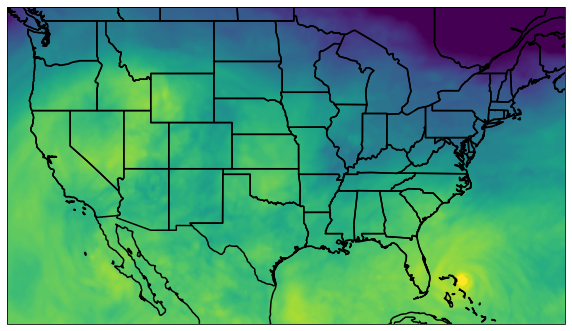

In [38]:
clevs = np.arange(256.,271.,0.1)
glon, glat = np.meshgrid(lon[c0:c1], lat[r0:r1])
subset_levels = levels[l0:l1]
plot_data = temp_data[subset_levels == 50000., :, :].reshape(lat[r0:r1].size, lon[c0:c1].size)
pc = ccrs.PlateCarree()
states = NaturalEarthFeature(category = 'cultural', scale = '50m', facecolor = 'none', name = 'admin_1_states_provinces_shp')
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection = ccrs.Mercator(central_longitude = 180., min_latitude = 22., max_latitude = 50.))
ax.set_extent([-127., -65., 22., 50.], crs = pc)
ax.coastlines('50m', linewidth = 1.5)
ax.add_feature(states, linewidth = 1.5, edgecolor = 'black')
im = ax.contourf(glon, glat, plot_data, clevs, extend = 'both', transform = pc)
plt.show()

In [37]:
plot_data

array([[256.9, 256.1, 255.8, ..., 251.3, 251.4, 251.5],
       [256.6, 256. , 255.7, ..., 251.6, 251.8, 251.9],
       [256.3, 256. , 255.7, ..., 252.1, 252.2, 252.4],
       ...,
       [267.3, 267.3, 267.2, ..., 266.7, 266.8, 267. ],
       [267.1, 267.2, 267. , ..., 266.9, 267. , 266.9],
       [267. , 267. , 267. , ..., 266.8, 267.1, 267. ]], dtype=float32)